In [41]:
# Will begin with imports. 
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
import matplotlib.pyplot as plt



In [2]:
# Loading in data
asset_data = Path("Data/project_data.csv")

asset_dataframe = pd.read_csv(asset_data, index_col = "date", parse_dates=True, infer_datetime_format=True)

asset_dataframe.head()



,BTC,LTC,XRP,ETH,BCN,sp500_close,change%,silver_close,silver_rate%,gold_close,gold_rate%
date,,,,,,,,,,,
2020-07-30,11111.213870,56.643112,0.244522,334.586639,0.000236,3246.219971,0.447,23.362,-0.035266,1966.8,-0.009618
2020-07-29,11100.467770,55.172005,0.243099,318.190887,0.000225,3258.439941,0.967,24.321,0.041050,1976.7,0.005034
2020-07-28,10912.823240,55.575207,0.230277,316.657257,0.000234,3218.439941,-0.489,24.300,-0.000863,1963.9,-0.006475
2020-07-27,10990.873050,52.950027,0.223672,321.514099,0.000247,3239.409912,0.608,24.501,0.008272,1955.4,-0.004328
2020-07-24,9536.892578,44.182541,0.204049,279.215424,0.000224,3215.629883,-0.092,22.850,-0.067385,1897.5,-0.029610


In [3]:
                                                                    ## Bitcoin

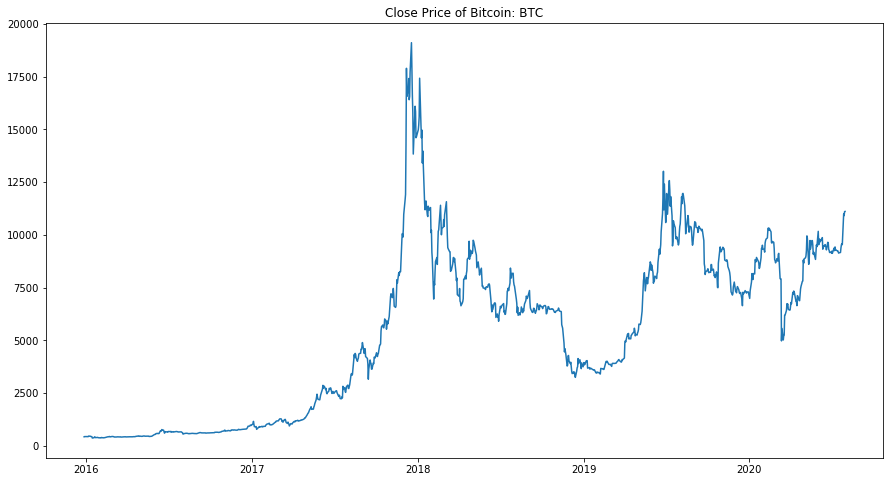

In [46]:
# Visually show close price, this will only be done for Bitcoin as it was a first run through and I had to visualise as I went
plt.figure(figsize = (15,8))
plt.title('Close Price of Bitcoin: BTC')
plt.plot(asset_dataframe['BTC'])
plt.show()

In [5]:
## Calculate the three exponential moving averages 

# Calculate the short/fast exponential moving average
short_ema = asset_dataframe.BTC.ewm(span = 5, adjust = False).mean()

# Calculate the long/slow EMA
long_ema = asset_dataframe.BTC.ewm(span = 63, adjust = False).mean()

# Calculate the medium EMA
medium_ema = asset_dataframe.BTC.ewm(span = 21, adjust = False).mean()

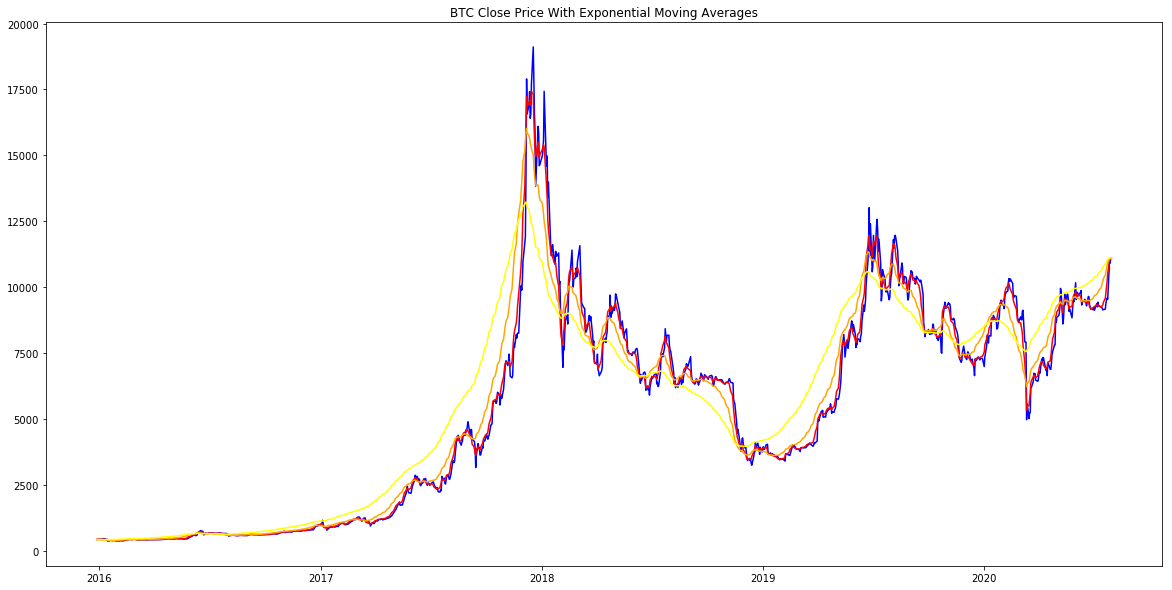

In [6]:
# Visualise the closing price and the exponential moving average
plt.figure(figsize = (20,10))
plt.title('BTC Close Price With Exponential Moving Averages')
plt.plot(asset_dataframe['BTC'], label = 'Close Price', color = 'blue')
plt.plot(short_ema, label = 'Short EMA', color = 'red')
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange')
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow')
plt.plot(legend = True)
plt.show()

In [7]:
# Add the EMA to the dataset
BTC = pd.DataFrame()
BTC['Close Price of BTC'] = asset_dataframe['BTC']
BTC['Short'] = short_ema
BTC['Middle'] = medium_ema
BTC['Long'] = long_ema

BTC.head(10)

,Close Price of BTC,Short,Middle,Long
date,,,,
2020-07-30,11111.213870,11111.213870,11111.213870,11111.213870
2020-07-29,11100.467770,11107.631837,11110.236952,11110.878054
2020-07-28,10912.823240,11042.695638,11092.290251,11104.688841
2020-07-27,10990.873050,11025.421442,11083.070505,11101.132098
2020-07-24,9536.892578,10529.245154,10942.508875,11052.249613
2020-07-23,9581.072266,10213.187525,10818.741911,11006.275321
2020-07-22,9525.363281,9983.912777,10701.162036,10959.996820
2020-07-21,9374.887695,9780.904416,10580.591641,10910.462159
2020-07-20,9164.231445,9575.346759,10451.831623,10855.892450


In [8]:
# Create a function to buy/sell the stock. This will run through the above dataframe and determine when these numbers correlate to the strategy. 

def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    for i in range(0,len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of BTC'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close Price of BTC'][i])
            buy_list.append(np.nan)
            flag_short = False
            
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of BTC'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close Price of BTC'][i])
            buy_list.append(np.nan)
            flag_long = False
            
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)

In [9]:
# Add the buy and sell signals to dataset to give a thorough view of the data. 
BTC['Buy'] = buy_sell_function(BTC)[0]
BTC['Sell'] = buy_sell_function(BTC)[1]



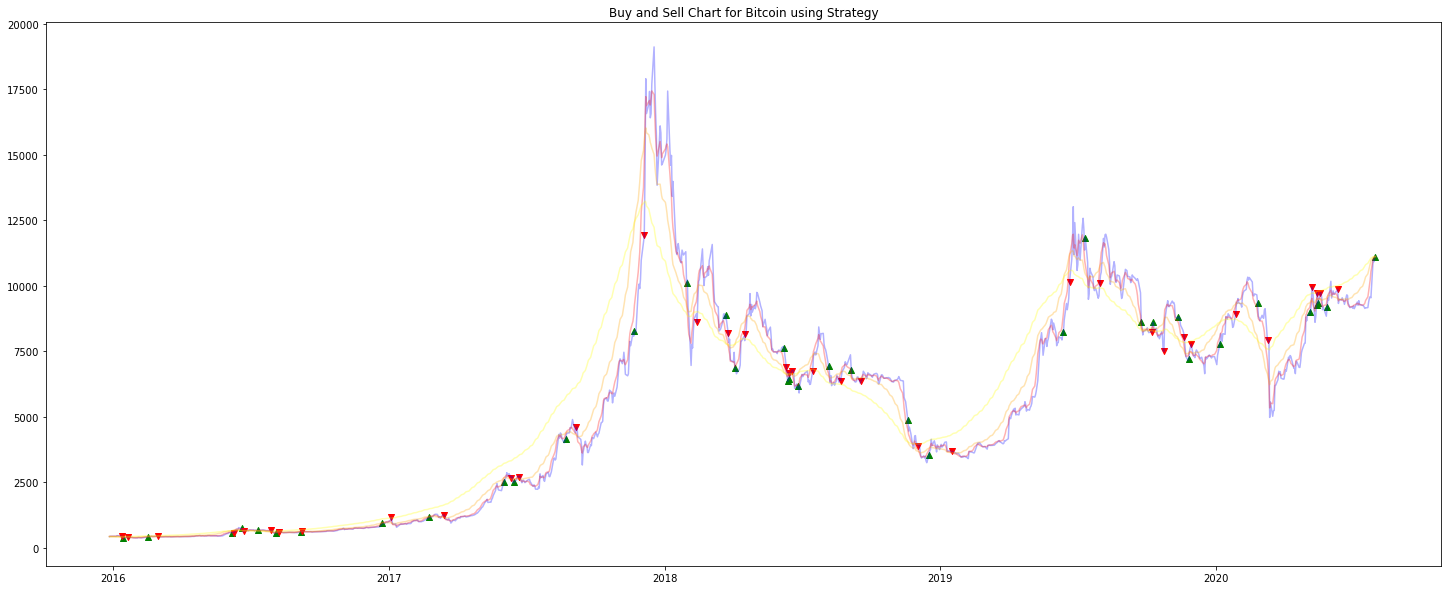

In [10]:
# Visually show when to buy/sell using this strategy. This just involves superimposing a scatter plot over the previous plot created earlier. 
plt.figure(figsize = (25,10))
plt.title('Buy and Sell Chart for Bitcoin using Strategy')
plt.plot(asset_dataframe['BTC'], label = 'Close Price', color = 'blue', alpha = 0.3)
plt.plot(short_ema, label = 'Short EMA', color = 'red', alpha = 0.3)
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange', alpha = 0.3)
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow', alpha = 0.3)
plt.scatter(BTC.index, BTC['Buy'], color = 'green', marker = '^', alpha = 1)
plt.scatter(BTC.index, BTC['Sell'], color = 'red', marker = 'v', alpha = 1)
plt.show()


In [11]:
# Calculate the Percentage Changes to get Overall Returns
## This part was rather difficult and required Richards help.

percentage_changes = pd.DataFrame()
percentage_changes['Buy'] = BTC['Buy'].ffill()
percentage_changes['Sell'] = BTC['Sell']

percentage_changes.dropna(subset = ['Sell'], inplace = True)

percentage_changes['PCT Change'] = percentage_changes['Sell']/percentage_changes['Buy'] -1

percentage_changes.count()
# The count function was used to ensure that this method of percentage returns would work, ensuring that the algorithm would only trigger a sell order if it had a buy order previously.

Buy           37
Sell          37
PCT Change    37
dtype: int64

In [12]:
overall_returns_BTC = percentage_changes['PCT Change'].sum()

overall_returns_BTC

-1.5788631494755987

In [13]:
                                                            # LTC/Litecoin Returns

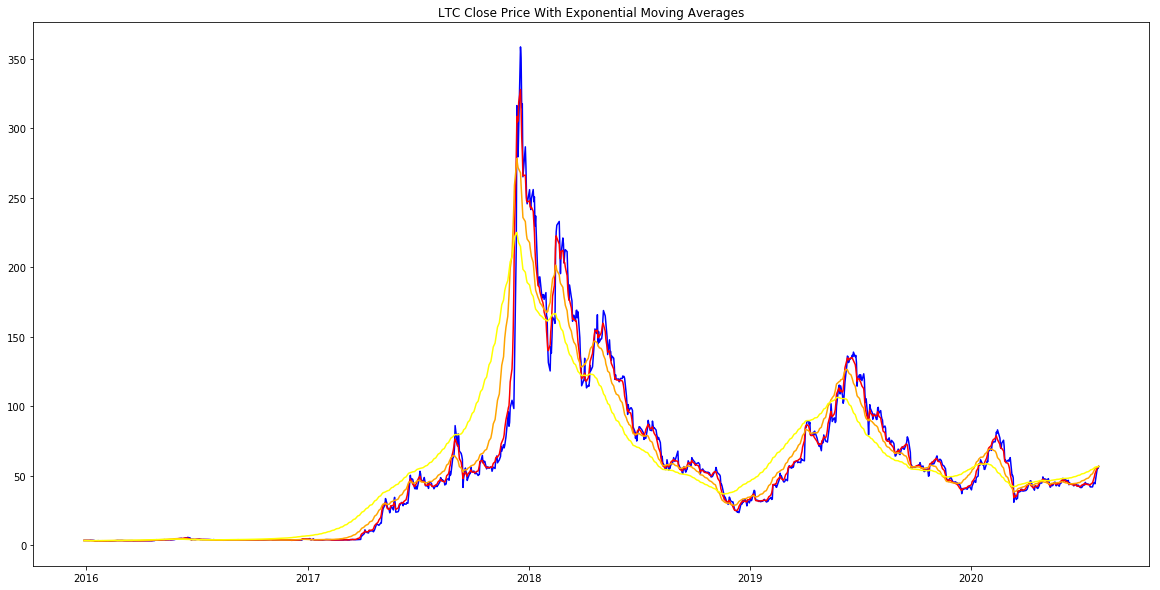

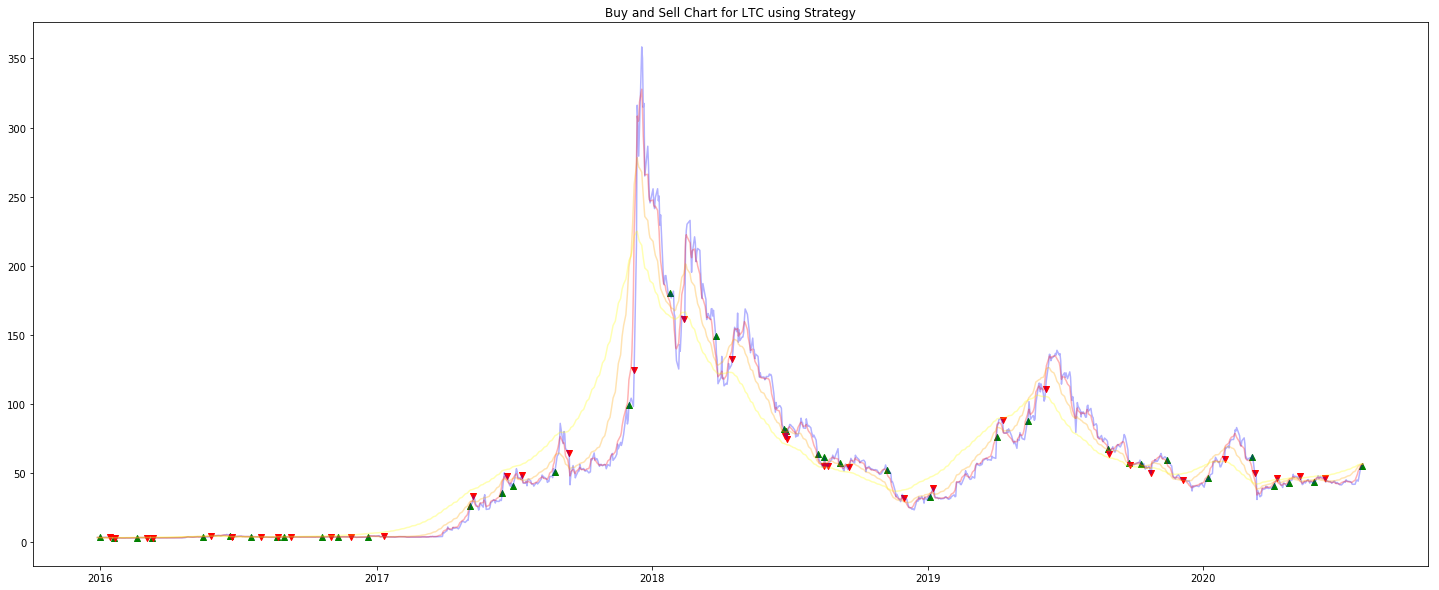

-0.17915337967864264

In [14]:

#Calculate the three moving averages 

# Calculate the short/fast exponential moving average
short_ema = asset_dataframe.LTC.ewm(span = 5, adjust = False).mean()

# Calculate the long/slow EMA
long_ema = asset_dataframe.LTC.ewm(span = 63, adjust = False).mean()

# Calculate the medium EMA
medium_ema = asset_dataframe.LTC.ewm(span = 21, adjust = False).mean()

# Visualise the closing price and the exponential moving average
plt.figure(figsize = (20,10))
plt.title('LTC Close Price With Exponential Moving Averages')
plt.plot(asset_dataframe['LTC'], label = 'Close Price', color = 'blue')
plt.plot(short_ema, label = 'Short EMA', color = 'red')
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange')
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow')
plt.plot(legend = True)
plt.show()

# Add the EMA to the dataset
LTC = pd.DataFrame()
LTC['Close Price of LTC'] = asset_dataframe['LTC']
LTC['Short'] = short_ema
LTC['Middle'] = medium_ema
LTC['Long'] = long_ema

# Create a function to buy/sell the stock

def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    for i in range(0,len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of LTC'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close Price of LTC'][i])
            buy_list.append(np.nan)
            flag_short = False
            
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of LTC'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close Price of LTC'][i])
            buy_list.append(np.nan)
            flag_long = False
            
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)


# Add the buy and sell signals to dataset
LTC['Buy'] = buy_sell_function(LTC)[0]
LTC['Sell'] = buy_sell_function(LTC)[1]

# Visually show when to buy/sell using this strategy
plt.figure(figsize = (25,10))
plt.title('Buy and Sell Chart for LTC using Strategy')
plt.plot(asset_dataframe['LTC'], label = 'Close Price', color = 'blue', alpha = 0.3)
plt.plot(short_ema, label = 'Short EMA', color = 'red', alpha = 0.3)
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange', alpha = 0.3)
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow', alpha = 0.3)
plt.scatter(LTC.index, LTC['Buy'], color = 'green', marker = '^', alpha = 1)
plt.scatter(LTC.index, LTC['Sell'], color = 'red', marker = 'v', alpha = 1)
plt.show()

# Calculate the Percentage Changes to get Overall Returns

percentage_changes = pd.DataFrame()
percentage_changes['Buy'] = LTC['Buy'].ffill()
percentage_changes['Sell'] = LTC['Sell']

percentage_changes.dropna(subset = ['Sell'], inplace = True)

percentage_changes['PCT Change'] = percentage_changes['Sell']/percentage_changes['Buy'] -1

overall_returns_LTC = percentage_changes['PCT Change'].sum()

overall_returns_LTC

In [15]:
                                                                        ## XRP

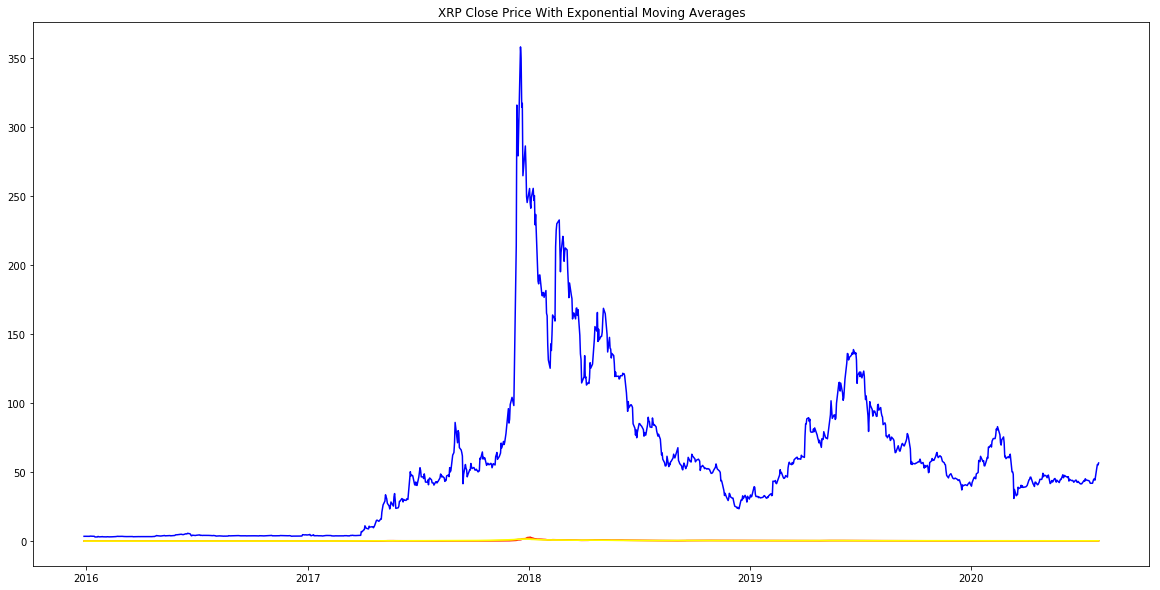

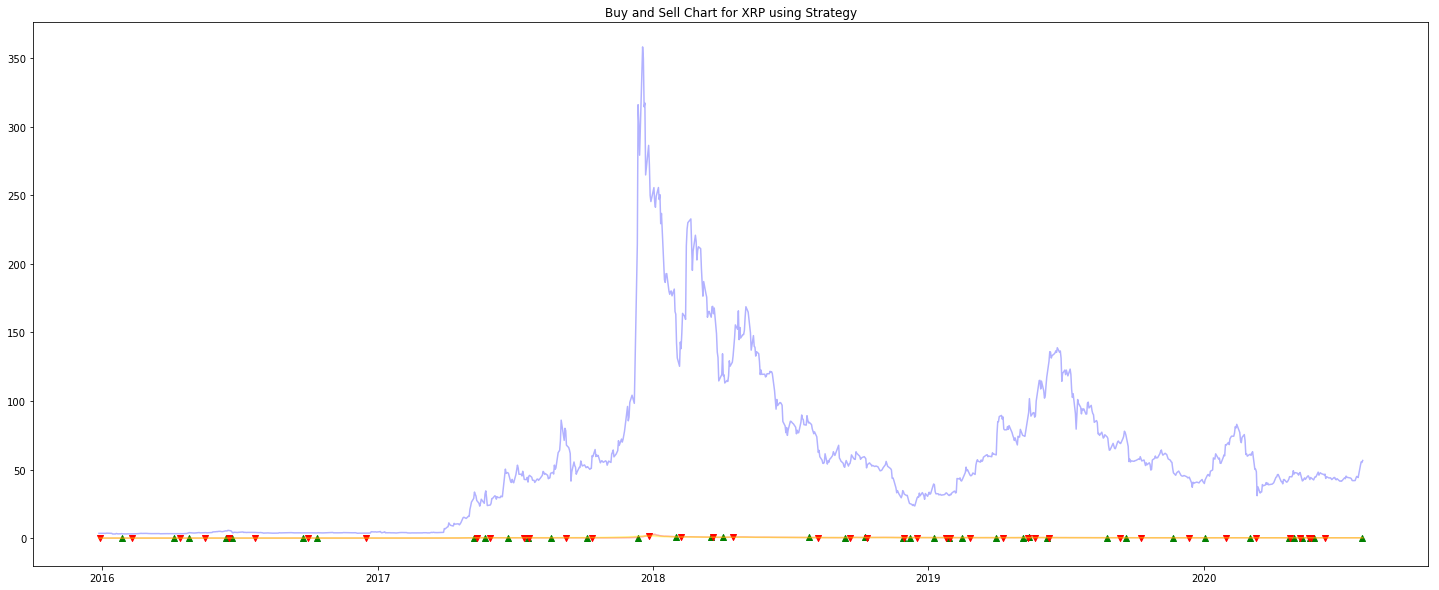

-0.22317453003048238

In [16]:
#Calculate the three moving averages 

# Calculate the short/fast exponential moving average
short_ema = asset_dataframe.XRP.ewm(span = 5, adjust = False).mean()

# Calculate the long/slow EMA
long_ema = asset_dataframe.XRP.ewm(span = 63, adjust = False).mean()

# Calculate the medium EMA
medium_ema = asset_dataframe.XRP.ewm(span = 21, adjust = False).mean()

# Visualise the closing price and the exponential moving average
plt.figure(figsize = (20,10))
plt.title('XRP Close Price With Exponential Moving Averages')
plt.plot(asset_dataframe['LTC'], label = 'Close Price', color = 'blue')
plt.plot(short_ema, label = 'Short EMA', color = 'red')
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange')
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow')
plt.plot(legend = True)
plt.show()

# Add the EMA to the dataset
XRP = pd.DataFrame()
XRP['Close Price of XRP'] = asset_dataframe['XRP']
XRP['Short'] = short_ema
XRP['Middle'] = medium_ema
XRP['Long'] = long_ema

# Create a function to buy/sell the stock

def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    for i in range(0,len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of XRP'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close Price of XRP'][i])
            buy_list.append(np.nan)
            flag_short = False
            
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of XRP'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close Price of XRP'][i])
            buy_list.append(np.nan)
            flag_long = False
            
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)


# Add the buy and sell signals to dataset
XRP['Buy'] = buy_sell_function(XRP)[0]
XRP['Sell'] = buy_sell_function(XRP)[1]

# Visually show when to buy/sell using this strategy
plt.figure(figsize = (25,10))
plt.title('Buy and Sell Chart for XRP using Strategy')
plt.plot(asset_dataframe['LTC'], label = 'Close Price', color = 'blue', alpha = 0.3)
plt.plot(short_ema, label = 'Short EMA', color = 'red', alpha = 0.3)
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange', alpha = 0.3)
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow', alpha = 0.3)
plt.scatter(XRP.index, XRP['Buy'], color = 'green', marker = '^', alpha = 1)
plt.scatter(XRP.index, XRP['Sell'], color = 'red', marker = 'v', alpha = 1)
plt.show()

# Calculate the Percentage Changes to get Overall Returns

percentage_changes = pd.DataFrame()
percentage_changes['Buy'] = XRP['Buy'].ffill()
percentage_changes['Sell'] = XRP['Sell']

percentage_changes.dropna(subset = ['Sell'], inplace = True)

percentage_changes['PCT Change'] = percentage_changes['Sell']/percentage_changes['Buy'] -1

overall_returns_XRP = percentage_changes['PCT Change'].sum()

overall_returns_XRP

In [17]:
                                                                    ## ETH

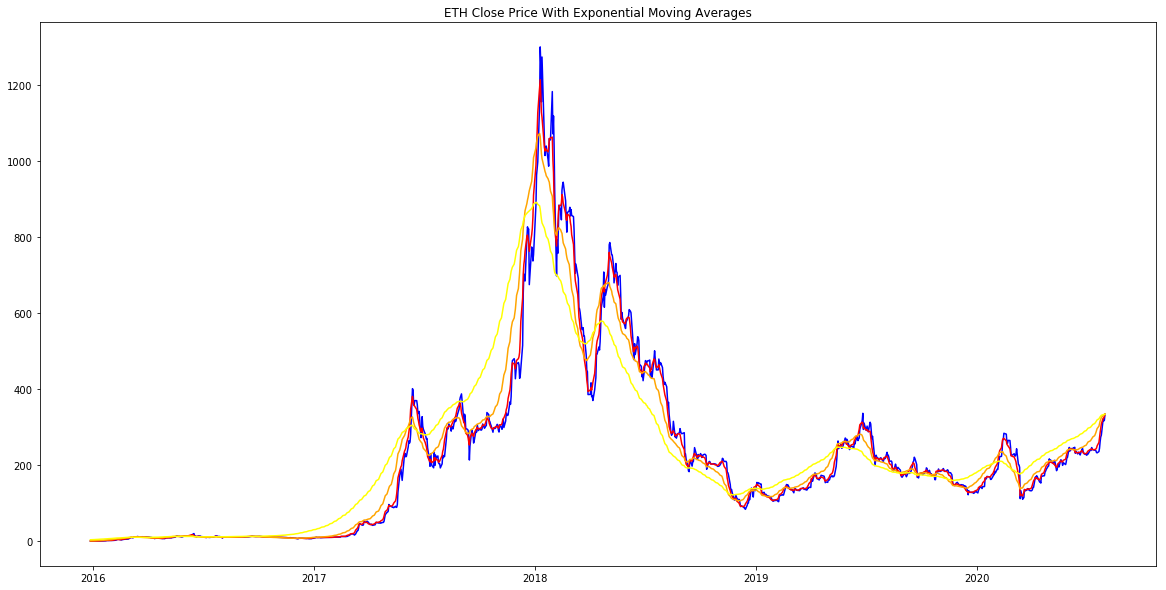

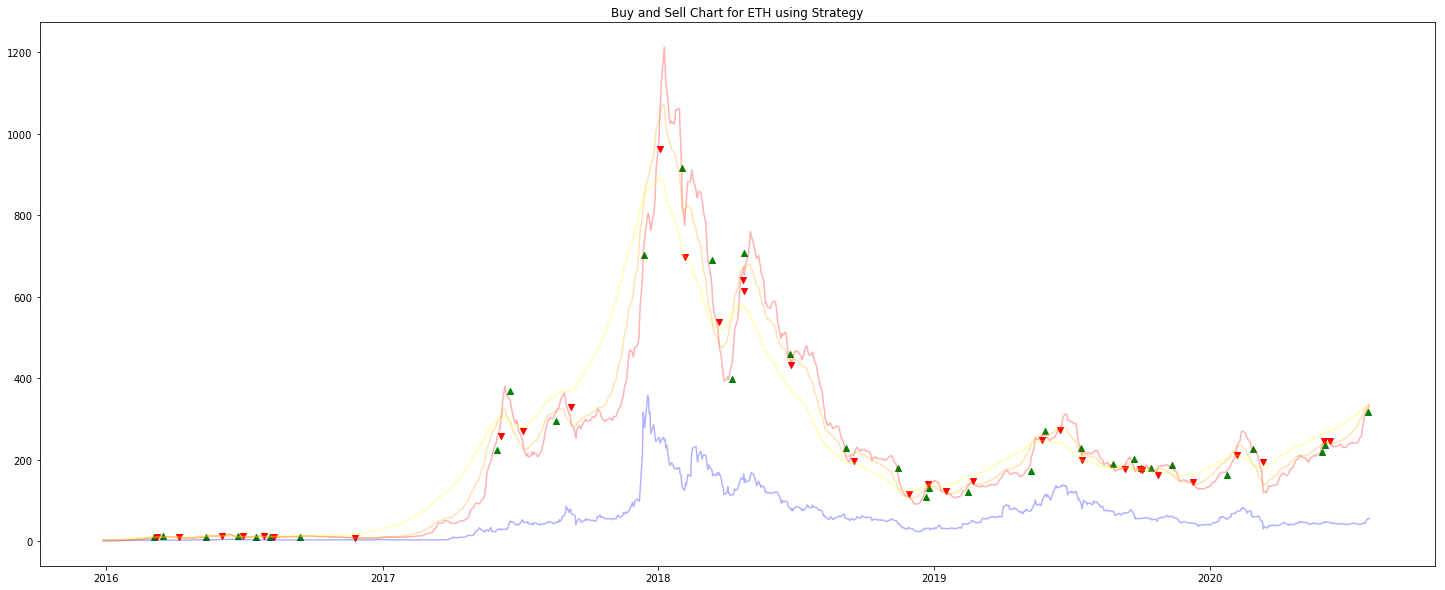

-0.7167938816688871

In [18]:

#Calculate the three moving averages 

# Calculate the short/fast exponential moving average
short_ema = asset_dataframe.ETH.ewm(span = 5, adjust = False).mean()

# Calculate the long/slow EMA
long_ema = asset_dataframe.ETH.ewm(span = 63, adjust = False).mean()

# Calculate the medium EMA
medium_ema = asset_dataframe.ETH.ewm(span = 21, adjust = False).mean()

# Visualise the closing price and the exponential moving average
plt.figure(figsize = (20,10))
plt.title('ETH Close Price With Exponential Moving Averages')
plt.plot(asset_dataframe['ETH'], label = 'Close Price', color = 'blue')
plt.plot(short_ema, label = 'Short EMA', color = 'red')
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange')
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow')
plt.plot(legend = True)
plt.show()

# Add the EMA to the dataset
ETH = pd.DataFrame()
ETH['Close Price of ETH'] = asset_dataframe['ETH']
ETH['Short'] = short_ema
ETH['Middle'] = medium_ema
ETH['Long'] = long_ema

# Create a function to buy/sell the stock

def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    for i in range(0,len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of ETH'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close Price of ETH'][i])
            buy_list.append(np.nan)
            flag_short = False
            
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of ETH'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close Price of ETH'][i])
            buy_list.append(np.nan)
            flag_long = False
            
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)


# Add the buy and sell signals to dataset
ETH['Buy'] = buy_sell_function(ETH)[0]
ETH['Sell'] = buy_sell_function(ETH)[1]

# Visually show when to buy/sell using this strategy
plt.figure(figsize = (25,10))
plt.title('Buy and Sell Chart for ETH using Strategy')
plt.plot(asset_dataframe['LTC'], label = 'Close Price', color = 'blue', alpha = 0.3)
plt.plot(short_ema, label = 'Short EMA', color = 'red', alpha = 0.3)
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange', alpha = 0.3)
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow', alpha = 0.3)
plt.scatter(ETH.index, ETH['Buy'], color = 'green', marker = '^', alpha = 1)
plt.scatter(ETH.index, ETH['Sell'], color = 'red', marker = 'v', alpha = 1)
plt.show()

# Calculate the Percentage Changes to get Overall Returns

percentage_changes = pd.DataFrame()
percentage_changes['Buy'] = ETH['Buy'].ffill()
percentage_changes['Sell'] = ETH['Sell']

percentage_changes.dropna(subset = ['Sell'], inplace = True)

percentage_changes['PCT Change'] = percentage_changes['Sell']/percentage_changes['Buy'] -1

overall_returns_ETH = percentage_changes['PCT Change'].sum()

overall_returns_ETH

In [19]:
                                                                    ## BCN

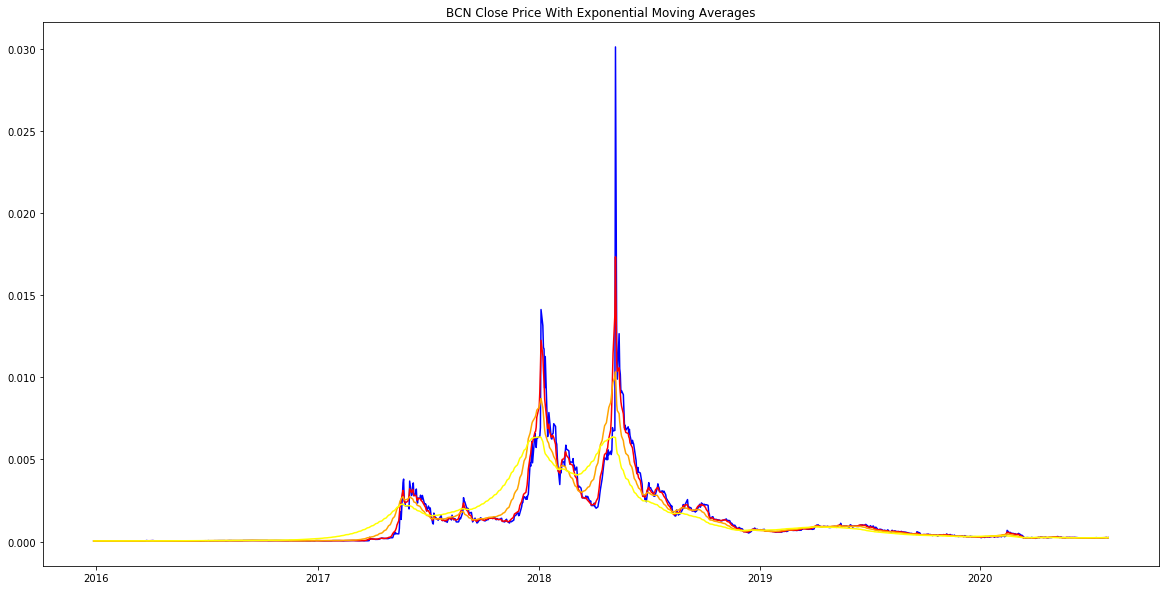

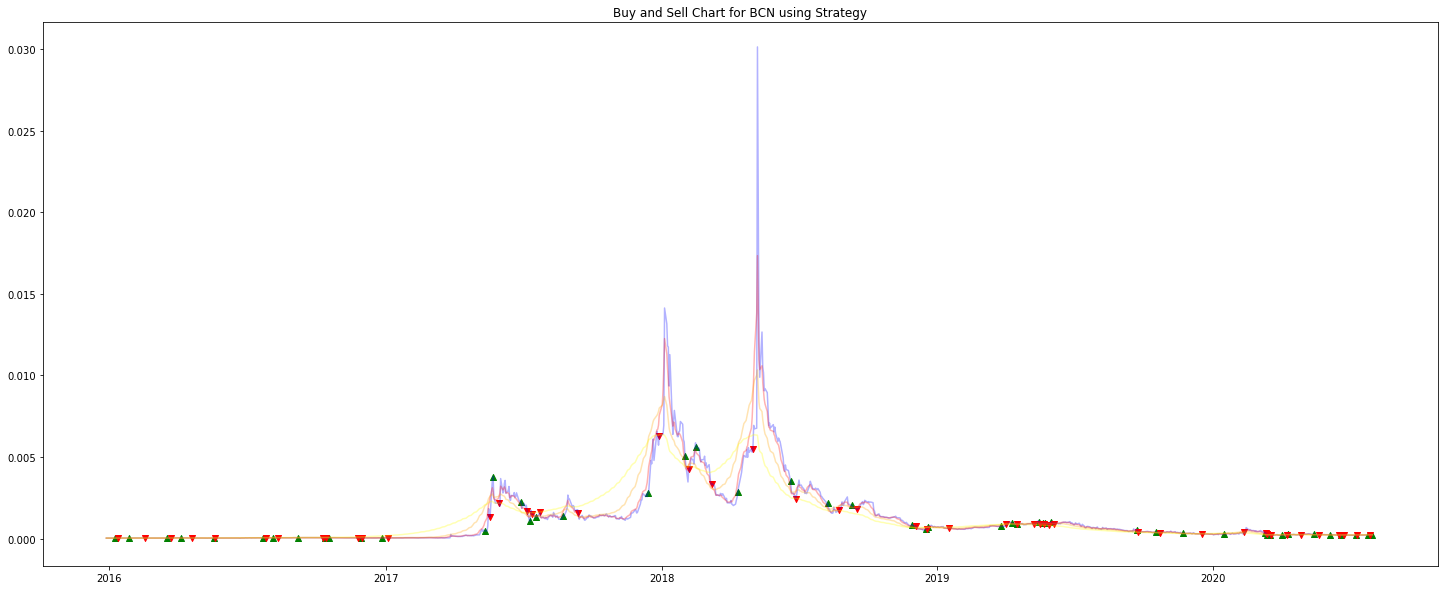

2.6760104266505627

In [20]:
#Calculate the three moving averages 

# Calculate the short/fast exponential moving average
short_ema = asset_dataframe.BCN.ewm(span = 5, adjust = False).mean()

# Calculate the long/slow EMA
long_ema = asset_dataframe.BCN.ewm(span = 63, adjust = False).mean()

# Calculate the medium EMA
medium_ema = asset_dataframe.BCN.ewm(span = 21, adjust = False).mean()

# Visualise the closing price and the exponential moving average
plt.figure(figsize = (20,10))
plt.title('BCN Close Price With Exponential Moving Averages')
plt.plot(asset_dataframe['BCN'], label = 'Close Price', color = 'blue')
plt.plot(short_ema, label = 'Short EMA', color = 'red')
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange')
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow')
plt.plot(legend = True)
plt.show()

# Add the EMA to the dataset
BCN = pd.DataFrame()
BCN['Close Price of BCN'] = asset_dataframe['BCN']
BCN['Short'] = short_ema
BCN['Middle'] = medium_ema
BCN['Long'] = long_ema

# Create a function to buy/sell the stock

def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    for i in range(0,len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of BCN'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close Price of BCN'][i])
            buy_list.append(np.nan)
            flag_short = False
            
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of BCN'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close Price of BCN'][i])
            buy_list.append(np.nan)
            flag_long = False
            
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)


# Add the buy and sell signals to dataset
BCN['Buy'] = buy_sell_function(BCN)[0]
BCN['Sell'] = buy_sell_function(BCN)[1]

# Visually show when to buy/sell using this strategy
plt.figure(figsize = (25,10))
plt.title('Buy and Sell Chart for BCN using Strategy')
plt.plot(asset_dataframe['BCN'], label = 'Close Price', color = 'blue', alpha = 0.3)
plt.plot(short_ema, label = 'Short EMA', color = 'red', alpha = 0.3)
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange', alpha = 0.3)
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow', alpha = 0.3)
plt.scatter(BCN.index, BCN['Buy'], color = 'green', marker = '^', alpha = 1)
plt.scatter(BCN.index, BCN['Sell'], color = 'red', marker = 'v', alpha = 1)
plt.show()

# Calculate the Percentage Changes to get Overall Returns

percentage_changes = pd.DataFrame()
percentage_changes['Buy'] = BCN['Buy'].ffill()
percentage_changes['Sell'] = BCN['Sell']

percentage_changes.dropna(subset = ['Sell'], inplace = True)

percentage_changes['PCT Change'] = percentage_changes['Sell']/percentage_changes['Buy'] -1

overall_returns_BCN = percentage_changes['PCT Change'].sum()

overall_returns_BCN

In [21]:
## S&P 500

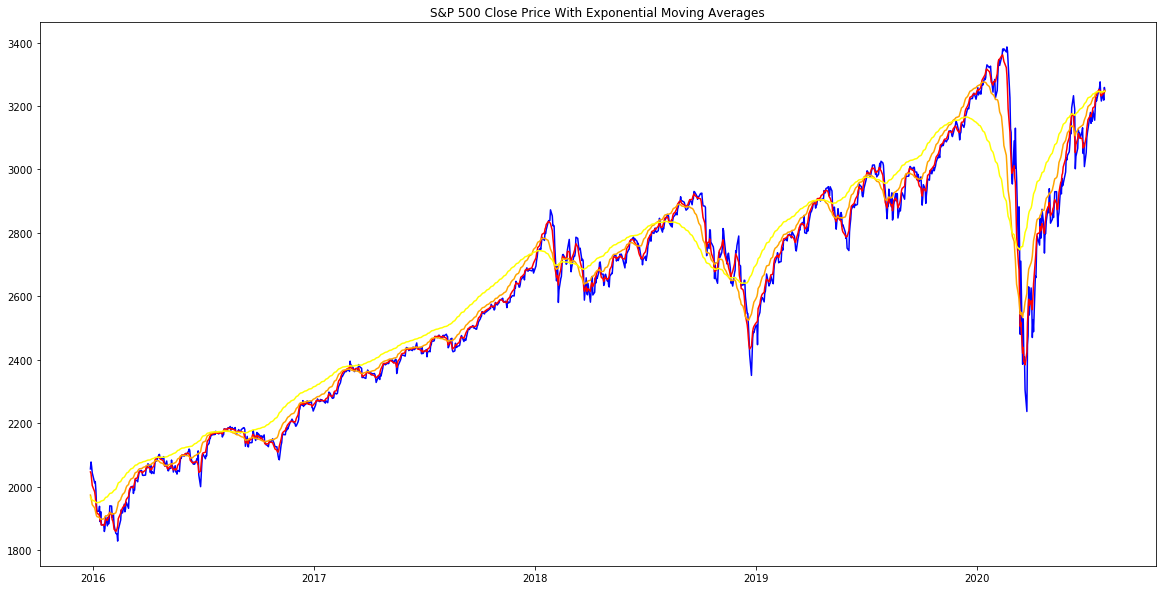

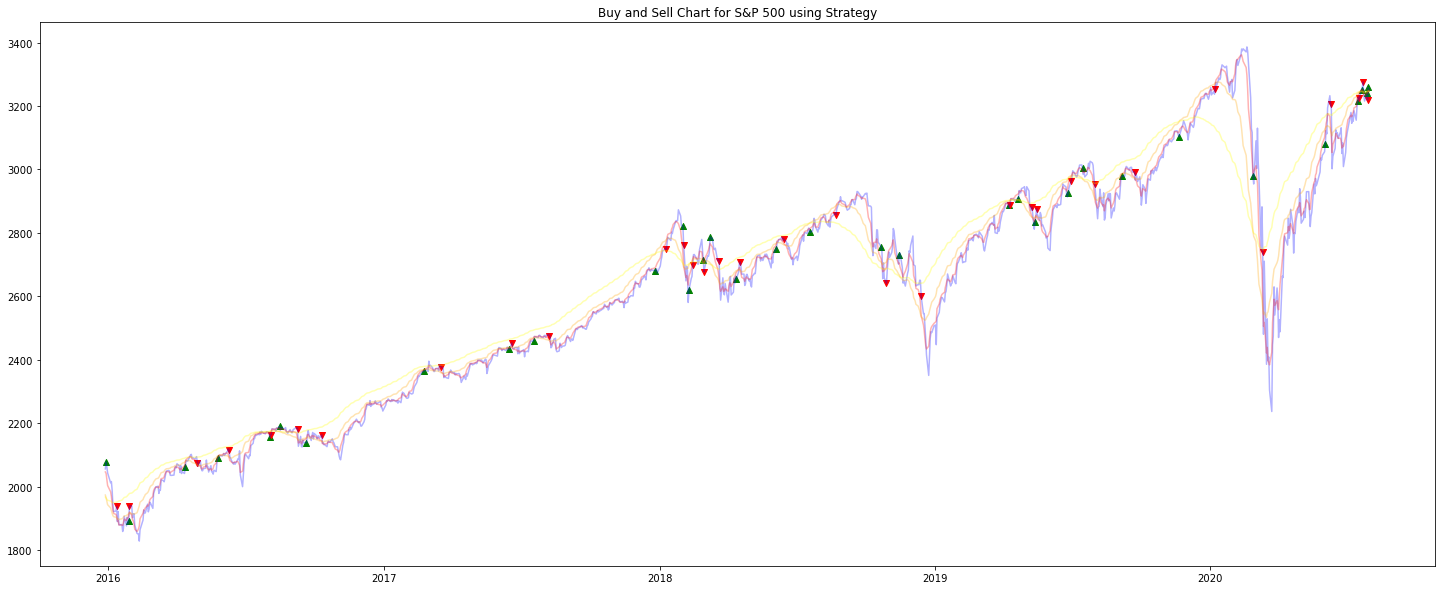

-0.44912099979103104

In [22]:

#Calculate the three moving averages 

# Calculate the short/fast exponential moving average
short_ema = asset_dataframe.sp500_close.ewm(span = 5, adjust = False).mean()

# Calculate the long/slow EMA
long_ema = asset_dataframe.sp500_close.ewm(span = 63, adjust = False).mean()

# Calculate the medium EMA
medium_ema = asset_dataframe.sp500_close.ewm(span = 21, adjust = False).mean()

# Visualise the closing price and the exponential moving average
plt.figure(figsize = (20,10))
plt.title('S&P 500 Close Price With Exponential Moving Averages')
plt.plot(asset_dataframe['sp500_close'], label = 'Close Price', color = 'blue')
plt.plot(short_ema, label = 'Short EMA', color = 'red')
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange')
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow')
plt.plot(legend = True)
plt.show()

# Add the EMA to the dataset
sp500_close = pd.DataFrame()
sp500_close['Close Price of S&P 500'] = asset_dataframe['sp500_close']
sp500_close['Short'] = short_ema
sp500_close['Middle'] = medium_ema
sp500_close['Long'] = long_ema

# Create a function to buy/sell the stock

def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    for i in range(0,len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of S&P 500'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close Price of S&P 500'][i])
            buy_list.append(np.nan)
            flag_short = False
            
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of S&P 500'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close Price of S&P 500'][i])
            buy_list.append(np.nan)
            flag_long = False
            
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)


# Add the buy and sell signals to dataset
sp500_close['Buy'] = buy_sell_function(sp500_close)[0]
sp500_close['Sell'] = buy_sell_function(sp500_close)[1]

# Visually show when to buy/sell using this strategy
plt.figure(figsize = (25,10))
plt.title('Buy and Sell Chart for S&P 500 using Strategy')
plt.plot(asset_dataframe['sp500_close'], label = 'Close Price', color = 'blue', alpha = 0.3)
plt.plot(short_ema, label = 'Short EMA', color = 'red', alpha = 0.3)
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange', alpha = 0.3)
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow', alpha = 0.3)
plt.scatter(sp500_close.index, sp500_close['Buy'], color = 'green', marker = '^', alpha = 1)
plt.scatter(sp500_close.index, sp500_close['Sell'], color = 'red', marker = 'v', alpha = 1)
plt.show()

# Calculate the Percentage Changes to get Overall Returns

percentage_changes = pd.DataFrame()
percentage_changes['Buy'] = sp500_close['Buy'].ffill()
percentage_changes['Sell'] = sp500_close['Sell']

percentage_changes.dropna(subset = ['Sell'], inplace = True)

percentage_changes['PCT Change'] = percentage_changes['Sell']/percentage_changes['Buy'] -1

overall_returns_sp500_close = percentage_changes['PCT Change'].sum()

overall_returns_sp500_close

In [23]:
                                                                    ## SILVER

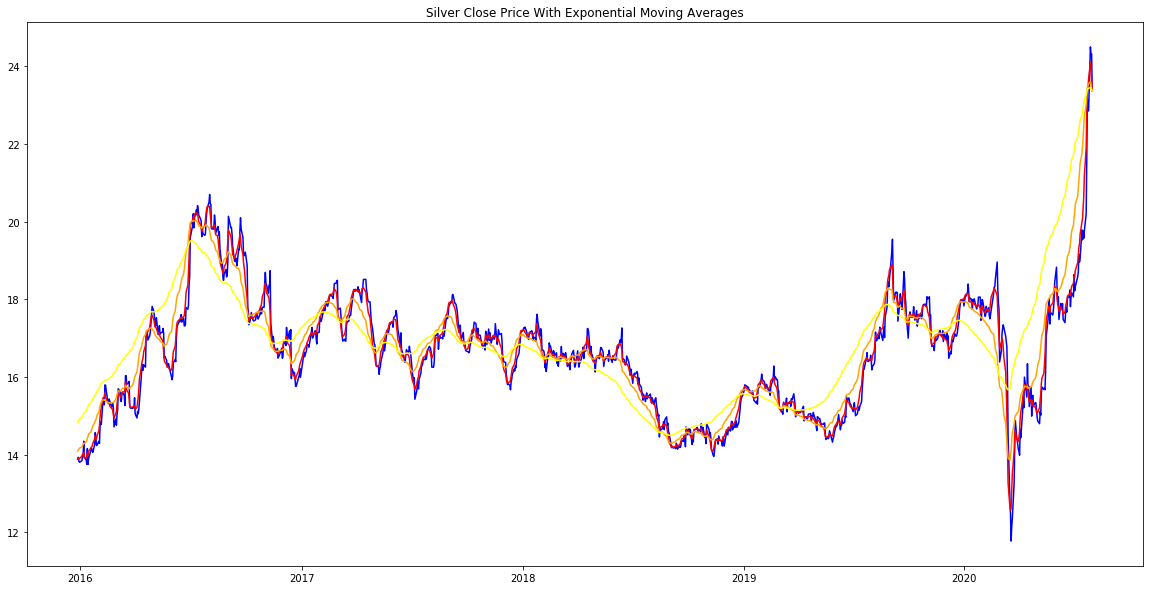

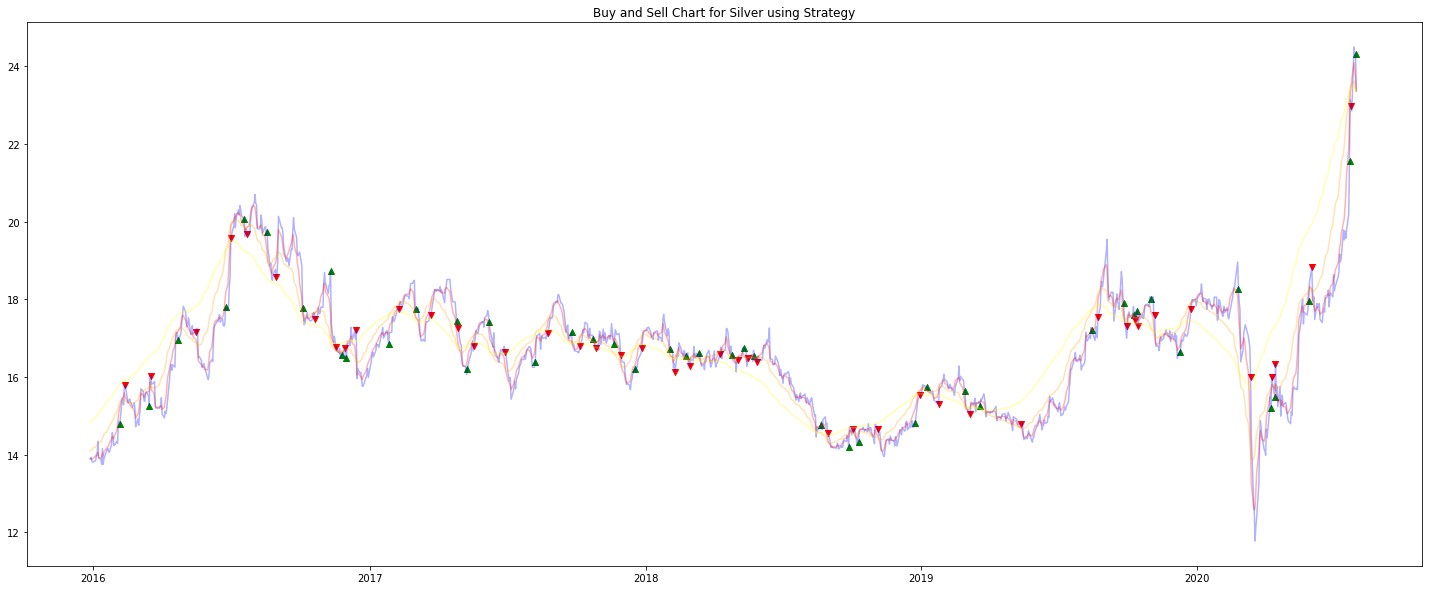

-0.3447211285014036

In [24]:
#Calculate the three moving averages 

# Calculate the short/fast exponential moving average
short_ema = asset_dataframe.silver_close.ewm(span = 5, adjust = False).mean()

# Calculate the long/slow EMA
long_ema = asset_dataframe.silver_close.ewm(span = 63, adjust = False).mean()

# Calculate the medium EMA
medium_ema = asset_dataframe.silver_close.ewm(span = 21, adjust = False).mean()

# Visualise the closing price and the exponential moving average
plt.figure(figsize = (20,10))
plt.title('Silver Close Price With Exponential Moving Averages')
plt.plot(asset_dataframe['silver_close'], label = 'Close Price', color = 'blue')
plt.plot(short_ema, label = 'Short EMA', color = 'red')
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange')
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow')
plt.plot(legend = True)
plt.show()

# Add the EMA to the dataset
silver_close = pd.DataFrame()
silver_close['Close Price of Silver'] = asset_dataframe['silver_close']
silver_close['Short'] = short_ema
silver_close['Middle'] = medium_ema
silver_close['Long'] = long_ema

# Create a function to buy/sell the stock

def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    for i in range(0,len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of Silver'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close Price of Silver'][i])
            buy_list.append(np.nan)
            flag_short = False
            
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of Silver'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close Price of Silver'][i])
            buy_list.append(np.nan)
            flag_long = False
            
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)


# Add the buy and sell signals to dataset
silver_close['Buy'] = buy_sell_function(silver_close)[0]
silver_close['Sell'] = buy_sell_function(silver_close)[1]

# Visually show when to buy/sell using this strategy
plt.figure(figsize = (25,10))
plt.title('Buy and Sell Chart for Silver using Strategy')
plt.plot(asset_dataframe['silver_close'], label = 'Close Price', color = 'blue', alpha = 0.3)
plt.plot(short_ema, label = 'Short EMA', color = 'red', alpha = 0.3)
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange', alpha = 0.3)
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow', alpha = 0.3)
plt.scatter(silver_close.index, silver_close['Buy'], color = 'green', marker = '^', alpha = 1)
plt.scatter(silver_close.index, silver_close['Sell'], color = 'red', marker = 'v', alpha = 1)
plt.show()

# Calculate the Percentage Changes to get Overall Returns

percentage_changes = pd.DataFrame()
percentage_changes['Buy'] = silver_close['Buy'].ffill()
percentage_changes['Sell'] = silver_close['Sell']

percentage_changes.dropna(subset = ['Sell'], inplace = True)

percentage_changes['PCT Change'] = percentage_changes['Sell']/percentage_changes['Buy'] -1

overall_returns_silver_close = percentage_changes['PCT Change'].sum()

overall_returns_silver_close

In [25]:
                                                                    ## GOLD

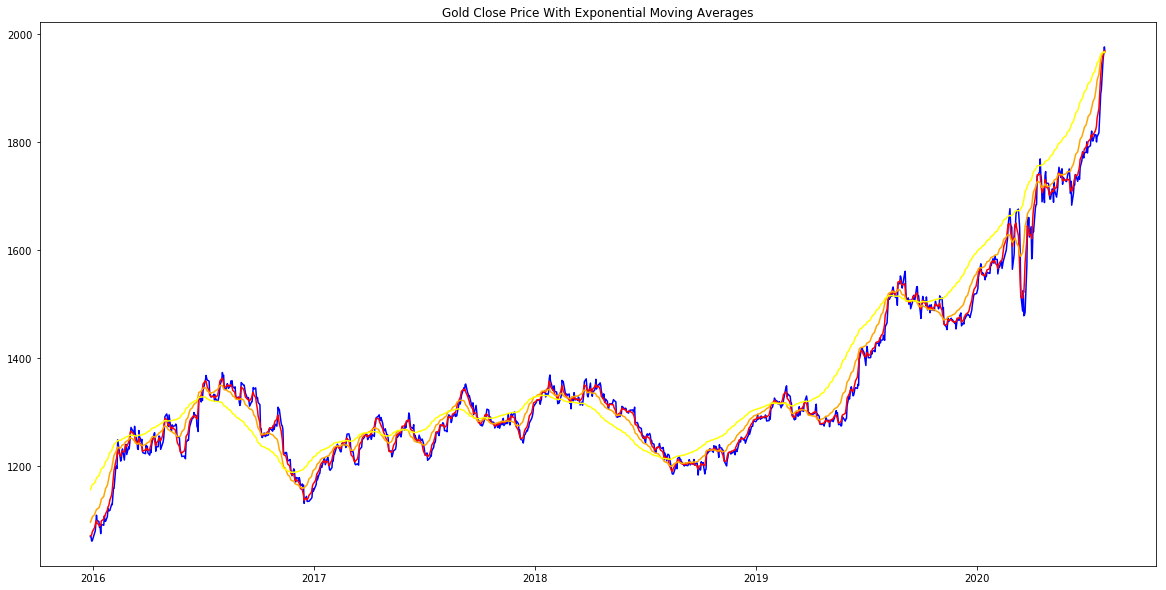

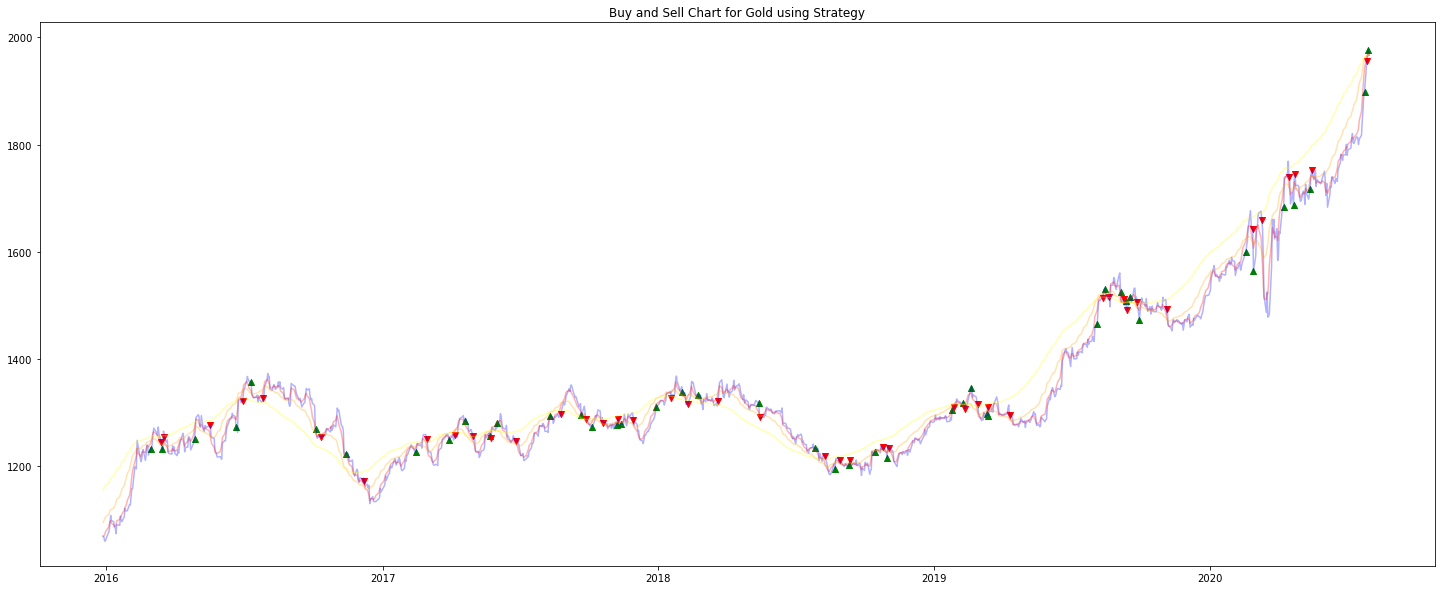

-0.24340329821032558

In [26]:

#Calculate the three moving averages 

# Calculate the short/fast exponential moving average
short_ema = asset_dataframe.gold_close.ewm(span = 5, adjust = False).mean()

# Calculate the long/slow EMA
long_ema = asset_dataframe.gold_close.ewm(span = 63, adjust = False).mean()

# Calculate the medium EMA
medium_ema = asset_dataframe.gold_close.ewm(span = 21, adjust = False).mean()

# Visualise the closing price and the exponential moving average
plt.figure(figsize = (20,10))
plt.title('Gold Close Price With Exponential Moving Averages')
plt.plot(asset_dataframe['gold_close'], label = 'Close Price', color = 'blue')
plt.plot(short_ema, label = 'Short EMA', color = 'red')
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange')
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow')
plt.plot(legend = True)
plt.show()

# Add the EMA to the dataset
gold_close = pd.DataFrame()
gold_close['Close Price of Gold'] = asset_dataframe['gold_close']
gold_close['Short'] = short_ema
gold_close['Middle'] = medium_ema
gold_close['Long'] = long_ema

# Create a function to buy/sell the stock

def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    for i in range(0,len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of Gold'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close Price of Gold'][i])
            buy_list.append(np.nan)
            flag_short = False
            
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close Price of Gold'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close Price of Gold'][i])
            buy_list.append(np.nan)
            flag_long = False
            
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)


# Add the buy and sell signals to dataset
gold_close['Buy'] = buy_sell_function(gold_close)[0]
gold_close['Sell'] = buy_sell_function(gold_close)[1]

# Visually show when to buy/sell using this strategy
plt.figure(figsize = (25,10))
plt.title('Buy and Sell Chart for Gold using Strategy')
plt.plot(asset_dataframe['gold_close'], label = 'Close Price', color = 'blue', alpha = 0.3)
plt.plot(short_ema, label = 'Short EMA', color = 'red', alpha = 0.3)
plt.plot(medium_ema, label = 'Medium EMA', color = 'orange', alpha = 0.3)
plt.plot(long_ema, label = 'Long EMA', color = 'Yellow', alpha = 0.3)
plt.scatter(gold_close.index, gold_close['Buy'], color = 'green', marker = '^', alpha = 1)
plt.scatter(gold_close.index, gold_close['Sell'], color = 'red', marker = 'v', alpha = 1)
plt.show()

# Calculate the Percentage Changes to get Overall Returns

percentage_changes = pd.DataFrame()
percentage_changes['Buy'] = gold_close['Buy'].ffill()
percentage_changes['Sell'] = gold_close['Sell']

percentage_changes.dropna(subset = ['Sell'], inplace = True)

percentage_changes['PCT Change'] = percentage_changes['Sell']/percentage_changes['Buy'] -1

overall_returns_gold_close = percentage_changes['PCT Change'].sum()

overall_returns_gold_close

In [27]:
                        ## Tally up Total Returns from the Algorithmic Trading Strategy and Consort into DataFrame

In [45]:
total_returns = pd.DataFrame()
total_returns['BTC'] = overall_returns_BTC
total_returns['LTC'] = overall_returns_LTC
total_returns['XRP'] = overall_returns_XRP
total_returns['ETH'] = overall_returns_ETH
total_returns['BCN'] = overall_returns_BCN
total_returns['S&P 500'] = overall_returns_sp500_close
total_returns['Silver'] = overall_returns_silver_close
total_returns['Gold'] = overall_returns_gold_close

total_returns

,BTC,LTC,XRP,ETH,BCN,S&P 500,Silver,Gold


In [36]:
print(f"The overall returns for Bitcoin using this algorithmic strategy are {overall_returns_BTC}%")
print(f"The overall returns for Litecoin using this algorithmic strategy are {overall_returns_LTC}%")
print(f"The overall returns for Ripple using this algorithmic strategy are {overall_returns_XRP}%")
print(f"The overall returns for Etherium using this algorithmic strategy are {overall_returns_ETH}%")
print(f"The overall returns for Bytecoin using this algorithmic strategy are {overall_returns_BCN}%")
print(f"The overall returns for the S&P 500 using this algorithmic strategy are {overall_returns_sp500_close}%")
print(f"The overall returns for Silver using this algorithmic strategy are {overall_returns_silver_close}%")
print(f"The overall returns for Gold using this algorithmic strategy are {overall_returns_gold_close}%")

The overall returns for Bitcoin using this algorithmic strategy are -1.5788631494755987%
The overall returns for Litecoin using this algorithmic strategy are -0.17915337967864264%
The overall returns for Ripple using this algorithmic strategy are -0.22317453003048238%
The overall returns for Etherium using this algorithmic strategy are -0.7167938816688871%
The overall returns for Bytecoin using this algorithmic strategy are 2.6760104266505627%
The overall returns for the S&P 500 using this algorithmic strategy are -0.44912099979103104%
The overall returns for Silver using this algorithmic strategy are -0.3447211285014036%
The overall returns for Gold using this algorithmic strategy are -0.24340329821032558%


In [40]:
# Calculate overall returns taking weightings of asset classes into consideration. 

crypto_returns = (0.2 * overall_returns_BTC) + (0.2 * overall_returns_LTC) + (0.2 * overall_returns_XRP) + (0.2 * overall_returns_ETH) + (0.2 * overall_returns_BCN) 

commodity_returns = (0.83 * overall_returns_gold_close) + (0.17 * overall_returns_silver_close)

bond_returns = 0.05

final_returns = (0.5 * overall_returns_sp500_close) + (0.1 * crypto_returns) + (0.2 * commodity_returns) + (0.2 * bond_returns)

print(f"Overall returns are {final_returns}%")

Overall returns are -0.26712545605153826%


In [ ]:
# REFERENCES

## Whilst not specifically necessary there were multiple videos and google tutorials which made this algorithm possible.

### https://www.youtube.com/watch?v=JrG5zfJFfrU&ab_channel=AlgoJi
### https://www.youtube.com/watch?v=rO_cqa4x60o&ab_channel=ComputerScience
### https://www.netpicks.com/three-moving-average-crossover/#:~:text=The%20three%20moving%20average%20crossover,moving%20averages%20of%20various%20lengths.&text=Using%20moving%20averages%2C%20instead%20of,on%20a%20particular%20chart%20location.